In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt

def display_img(img, cmap=None):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img, cmap=cmap)
    ax.axis("off") 
    plt.show()


In [30]:
ressess = cv2.imread("D:\\Python files\\Computer-Vision-with-Python\\DATA\\reeses_puffs.png", cv2.IMREAD_GRAYSCALE)
cereals = cv2.imread("D:\\Python files\\Computer-Vision-with-Python\\DATA\\many_cereals.jpg", cv2.IMREAD_GRAYSCALE)

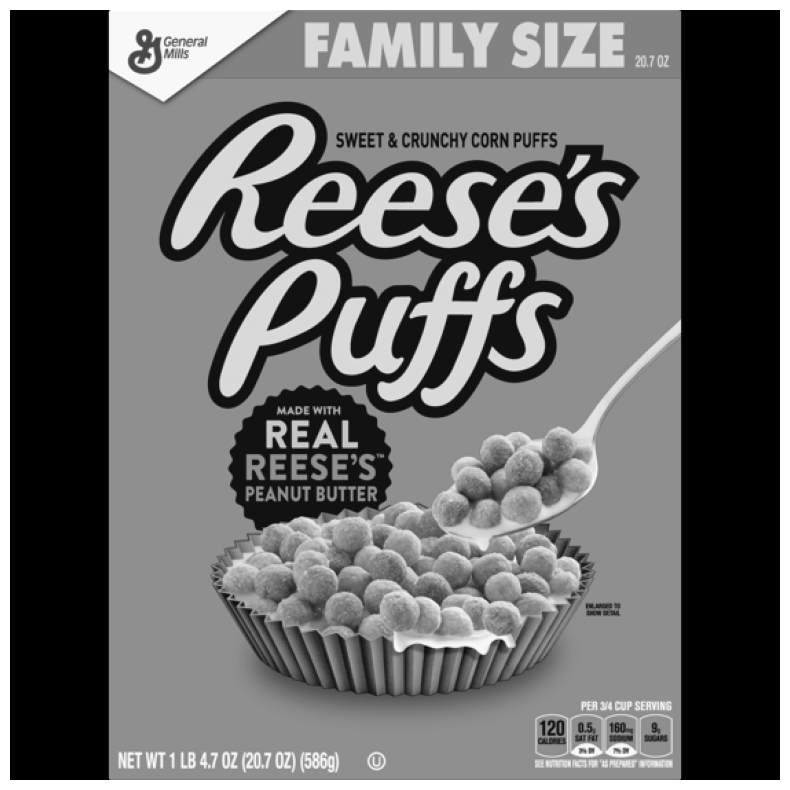

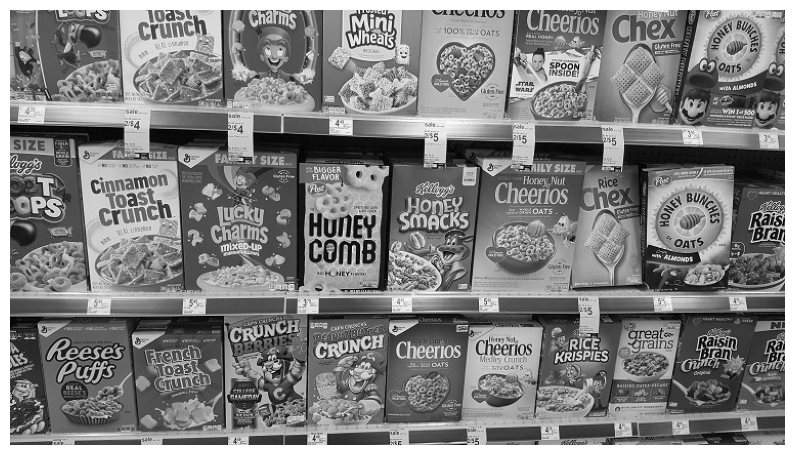

In [31]:
display_img(ressess,"gray")
display_img(cereals,"gray")

In [32]:
orb = cv2.ORB_create()
key1, desc1 = orb.detectAndCompute(ressess, None)
key2, desc2 = orb.detectAndCompute(cereals, None)


In [33]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= True)

In [34]:
matches = bf.match(desc1, desc2)
matches = sorted(matches, key= lambda x : x.distance)

In [35]:
matches

[< cv2.DMatch 000001887480C850>,
 < cv2.DMatch 000001887480C770>,
 < cv2.DMatch 000001887480C250>,
 < cv2.DMatch 000001887480C910>,
 < cv2.DMatch 000001887480CD70>,
 < cv2.DMatch 000001887480CF50>,
 < cv2.DMatch 000001887480CD10>,
 < cv2.DMatch 000001887480CA10>,
 < cv2.DMatch 000001887480CA30>,
 < cv2.DMatch 000001887480C7B0>,
 < cv2.DMatch 000001887480CC90>,
 < cv2.DMatch 000001887480CDD0>,
 < cv2.DMatch 00000188741C3790>,
 < cv2.DMatch 000001887480C5F0>,
 < cv2.DMatch 000001887480C690>,
 < cv2.DMatch 000001887480C7F0>,
 < cv2.DMatch 000001887480CB10>,
 < cv2.DMatch 00000188741C3470>,
 < cv2.DMatch 000001887480C130>,
 < cv2.DMatch 000001887480CA70>,
 < cv2.DMatch 00000188745645F0>,
 < cv2.DMatch 000001887480CCF0>,
 < cv2.DMatch 000001887480CD50>,
 < cv2.DMatch 000001887480CEF0>,
 < cv2.DMatch 000001887480D070>,
 < cv2.DMatch 000001887480C350>,
 < cv2.DMatch 000001887480C8F0>,
 < cv2.DMatch 000001887480C930>,
 < cv2.DMatch 000001887480CAD0>,
 < cv2.DMatch 000001887480C650>,
 < cv2.DMa

In [36]:
source_match = cv2.drawMatches(ressess, key1, cereals, key2, matches[:50], None , flags= 2)

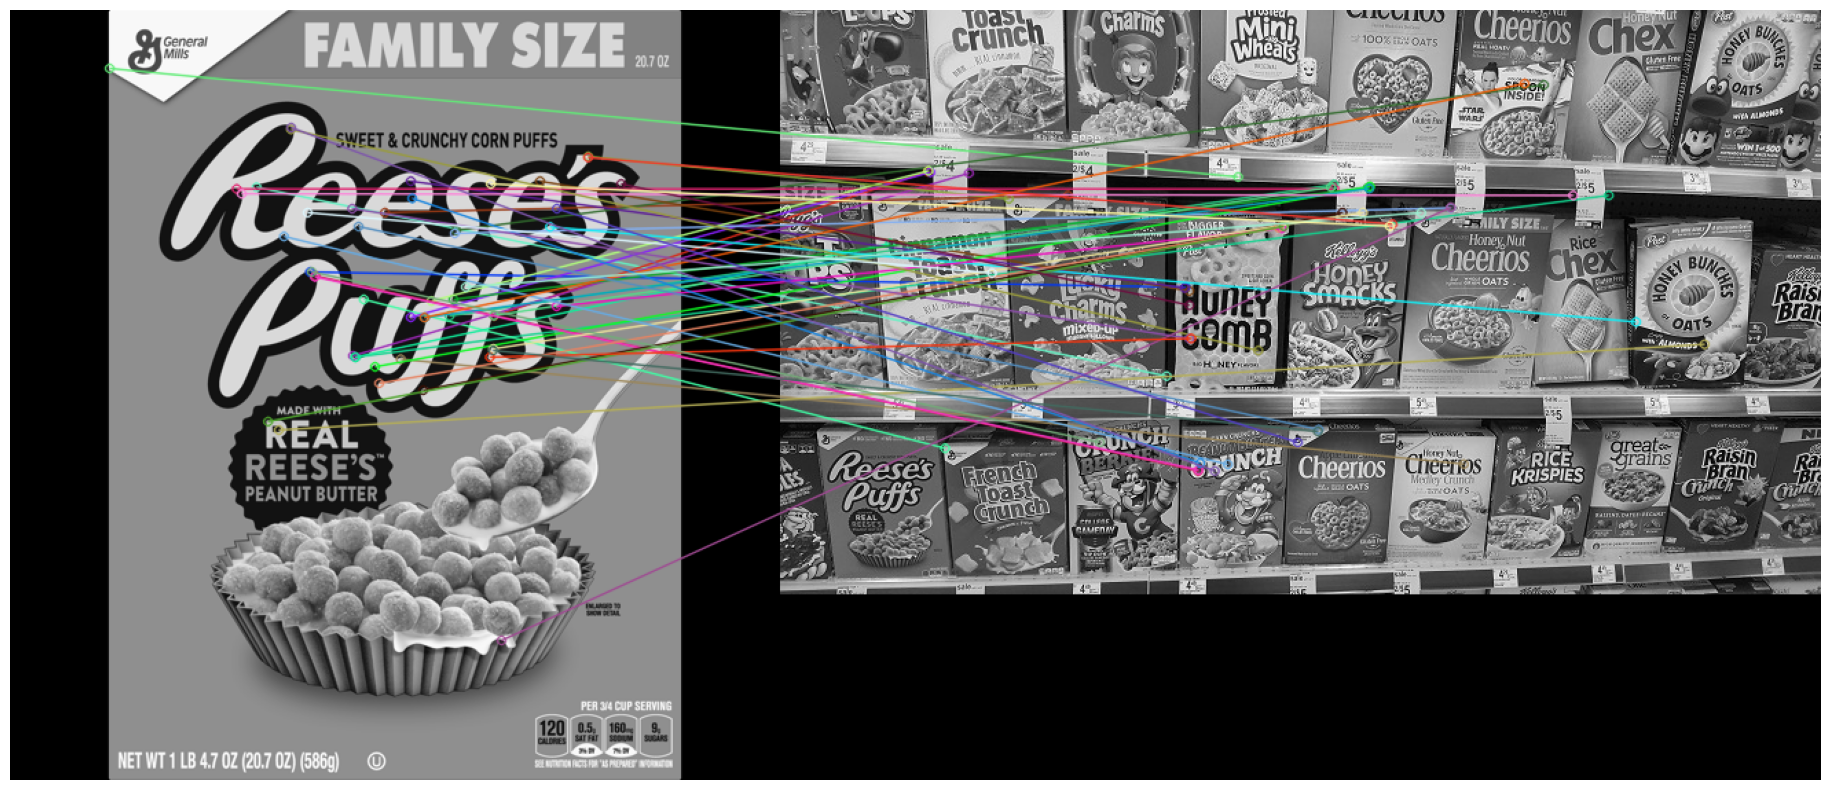

In [37]:
fig, ax = plt.subplots(figsize=(25,10))
ax.imshow(source_match, cmap="gray")
ax.axis("off") 
plt.show()

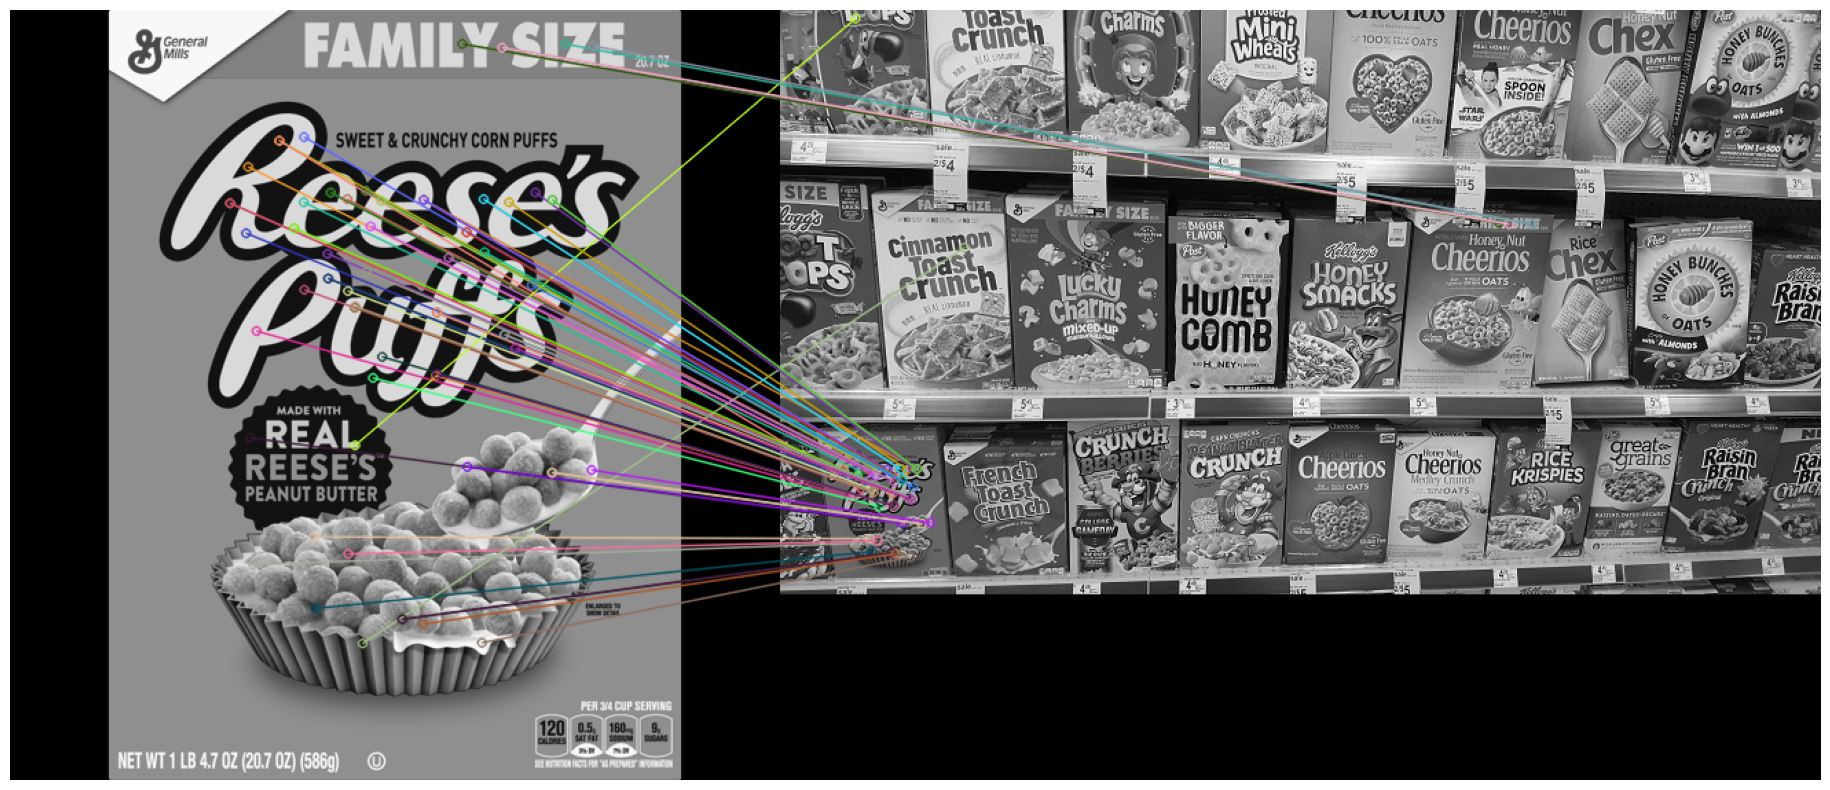

In [50]:
sift = cv2.SIFT_create()
key1, desc1 = sift.detectAndCompute(ressess, None)
key2, desc2 = sift.detectAndCompute(cereals, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k= 2)
good = []
for match1, match2 in matches:
    if match1.distance < (match2.distance * 0.7):
        good.append(match1)
match_figure = cv2.drawMatches(ressess,key1, cereals, key2,good , None, flags= cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig, ax = plt.subplots(figsize=(25,10))
ax.imshow(match_figure, cmap="gray")
ax.axis("off") 
plt.show()

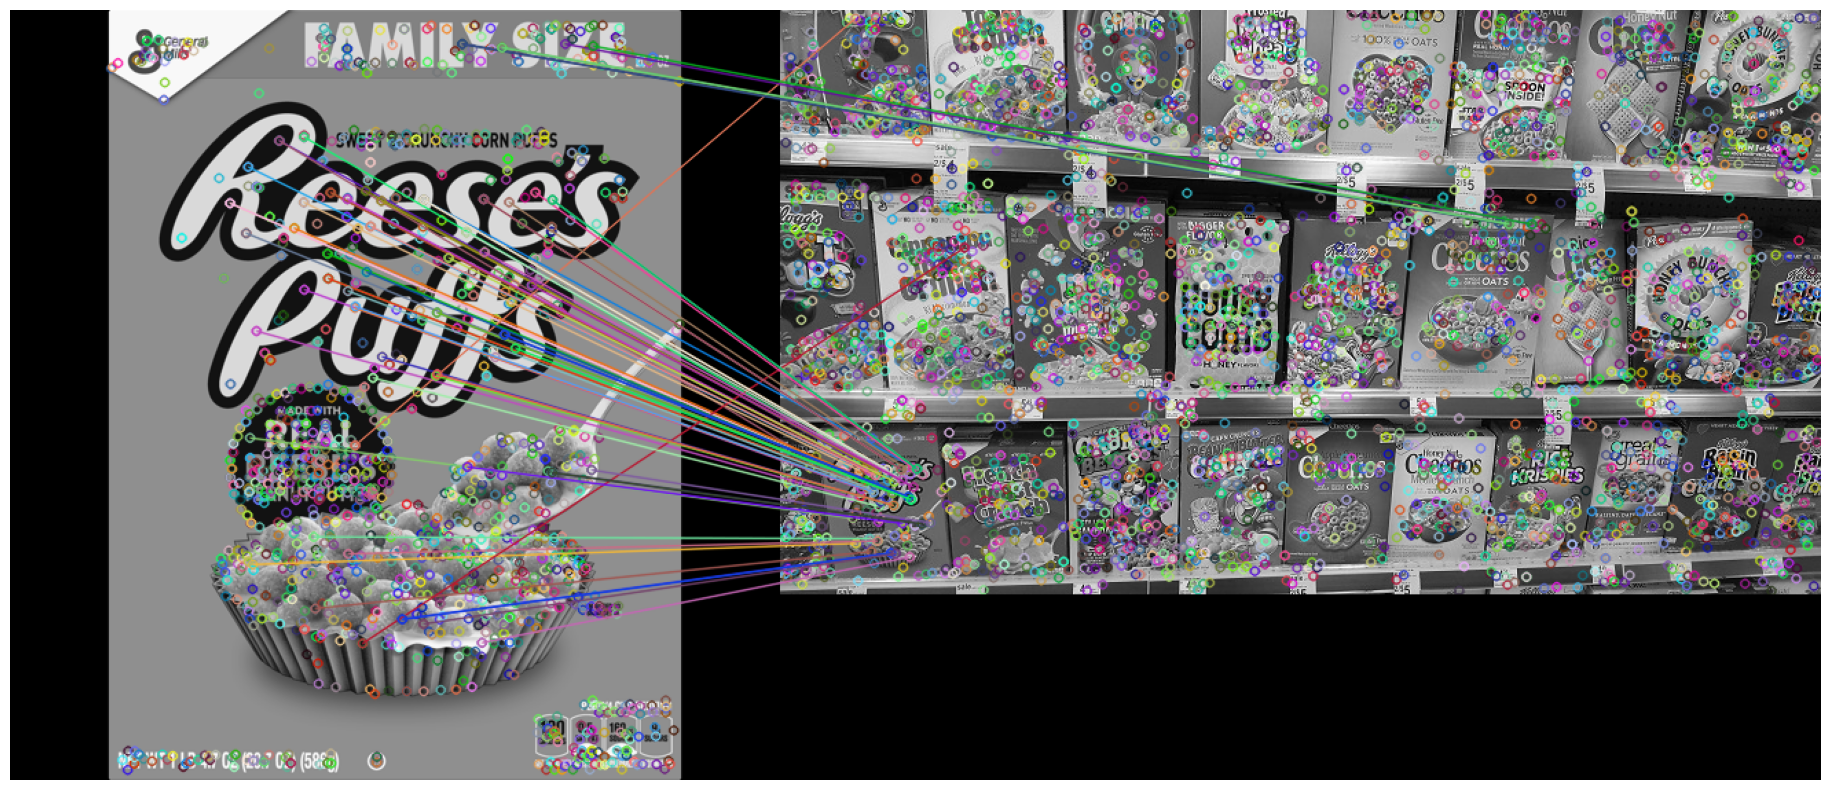

In [51]:
sift = cv2.SIFT_create()
key1, desc1 = sift.detectAndCompute(ressess, None)
key2, desc2 = sift.detectAndCompute(cereals, None)
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc1, desc2, k=2)
good = []
for match1, match2 in matches:
    if match1.distance < (match2.distance * 0.7):
        good.append(match1)
match_figure = cv2.drawMatches(ressess,key1, cereals, key2,good , None, flags= 0 )
fig, ax = plt.subplots(figsize=(25,10))
ax.imshow(match_figure, cmap="gray")
ax.axis("off") 
plt.show()

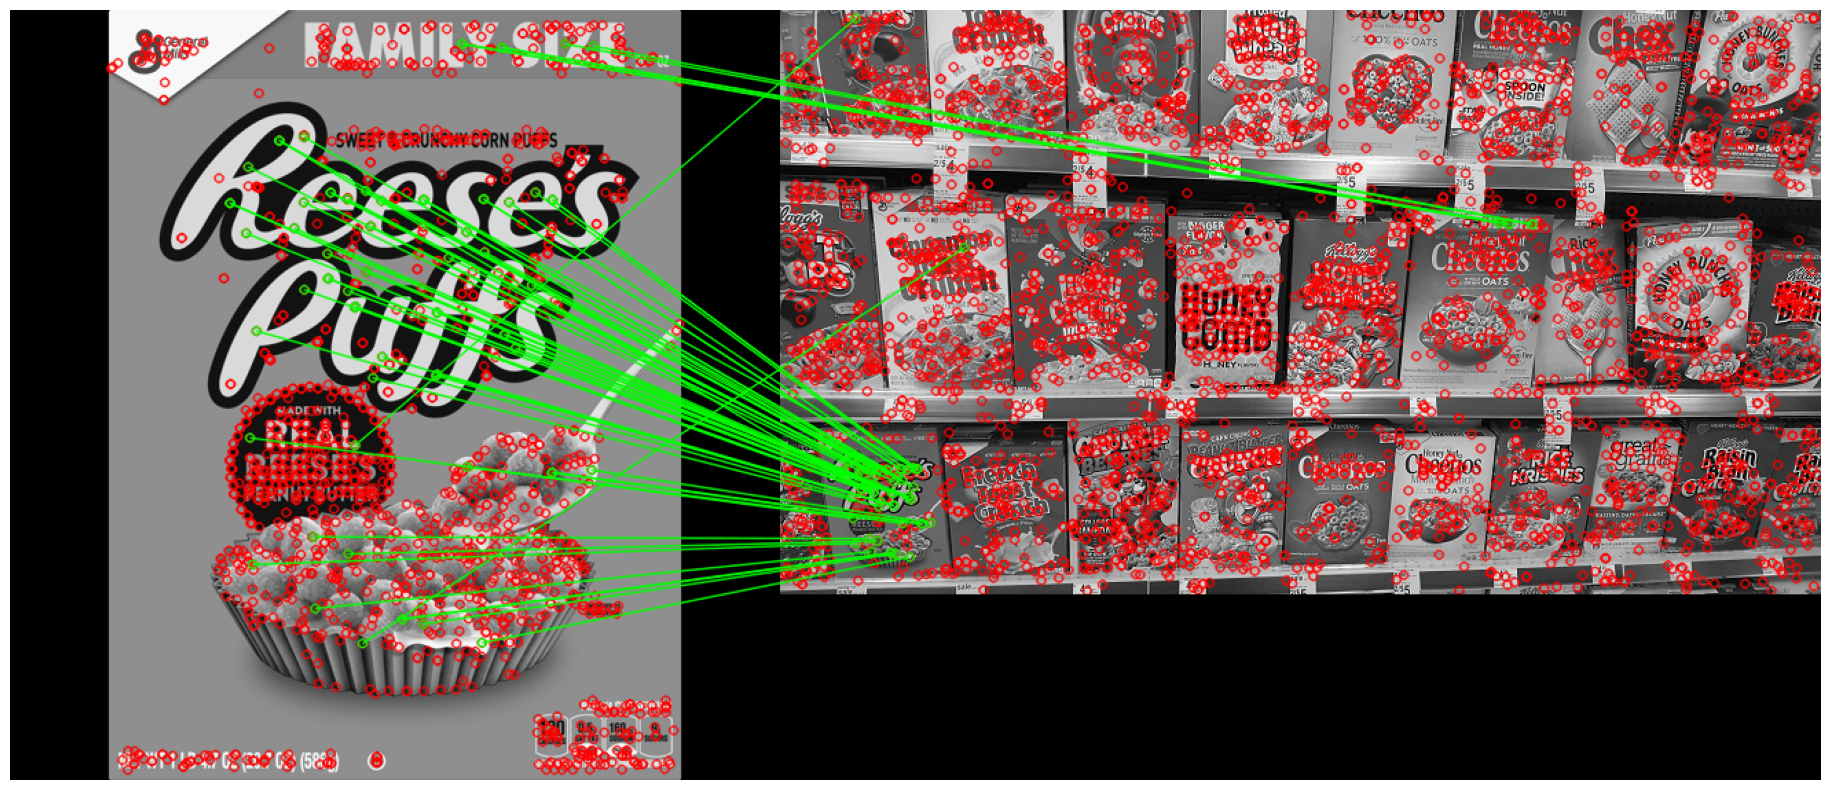

In [60]:
sift = cv2.SIFT_create()
key1, desc1 = sift.detectAndCompute(ressess, None)
key2, desc2 = sift.detectAndCompute(cereals, None)
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc1, desc2, k=2)

good = []
matches_mask = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
        matches_mask.append(1)   # one mask per good match


draw_params = dict(
    matchColor=(0,255,0),
    singlePointColor=(255,0,0),
    matchesMask=matches_mask,
    flags=0
)

match_figure = cv2.drawMatches(
    ressess, key1,
    cereals, key2,
    good,
    None,
    **draw_params
)
fig, ax = plt.subplots(figsize=(25,10))
ax.imshow(match_figure, cmap="gray")
ax.axis("off")
plt.show()